# Brief description of the project

Current project represents an Online shopping program.

The following steps have been taken for creating the program:

1․ A UML diagram has been created which describes the relationship between classes created for "Buyer" and "Seller" users;

2․ Corresponding classes have been created, which are conditionally divided into 2 groups:
    
    "Seller" classes:
        *   Category - Class for the category of sold products
        *   Product - Class for sold products
        *   Person - Parent class from which Courier, Supplier և RegisteredUser classes are inhereted
        *   Courier - Class for couriers
        *   Supplier - Class for suppliers
        *   ProductManagment - Class for shop's manager's functions which gives an opportunity to add and remove products, categories, couriers, suppliers, as well as to search for different values in different classes
        
        "Buyer" classes:
        *   RegisteredUser - Class for registered users. The program assumes that only registered users can make onlie purchases
        *   SignIn - Class for signing into program
        *   OrderConstructor - Class for constructing a shopping bag
        *   OrderDetail - Class for adding delivery details
        *   Order - Class for submitting the order
        *   Payment - Class for choosing payment method
        *   CardPayment - Class for filling Card details in case of non-cash payments
        *   UserManagment - Class for registered user's functions which gives an opportunity to register in the system, sign into the program, edit account and make purchases
        
3․ A separate class and appropriate descriptors have been created for getters and setters;

4․ Real dataset is parsed from www.6pm.com online shop and kept in MySql database;

5․ An interface for "Seller" and "Buyer" users are created using tkinter interface tools and command line.


The following links are used in the program:

https://www.6pm.com/


### UML diagram

Link - https://tinyurl.com/6bv99v5s

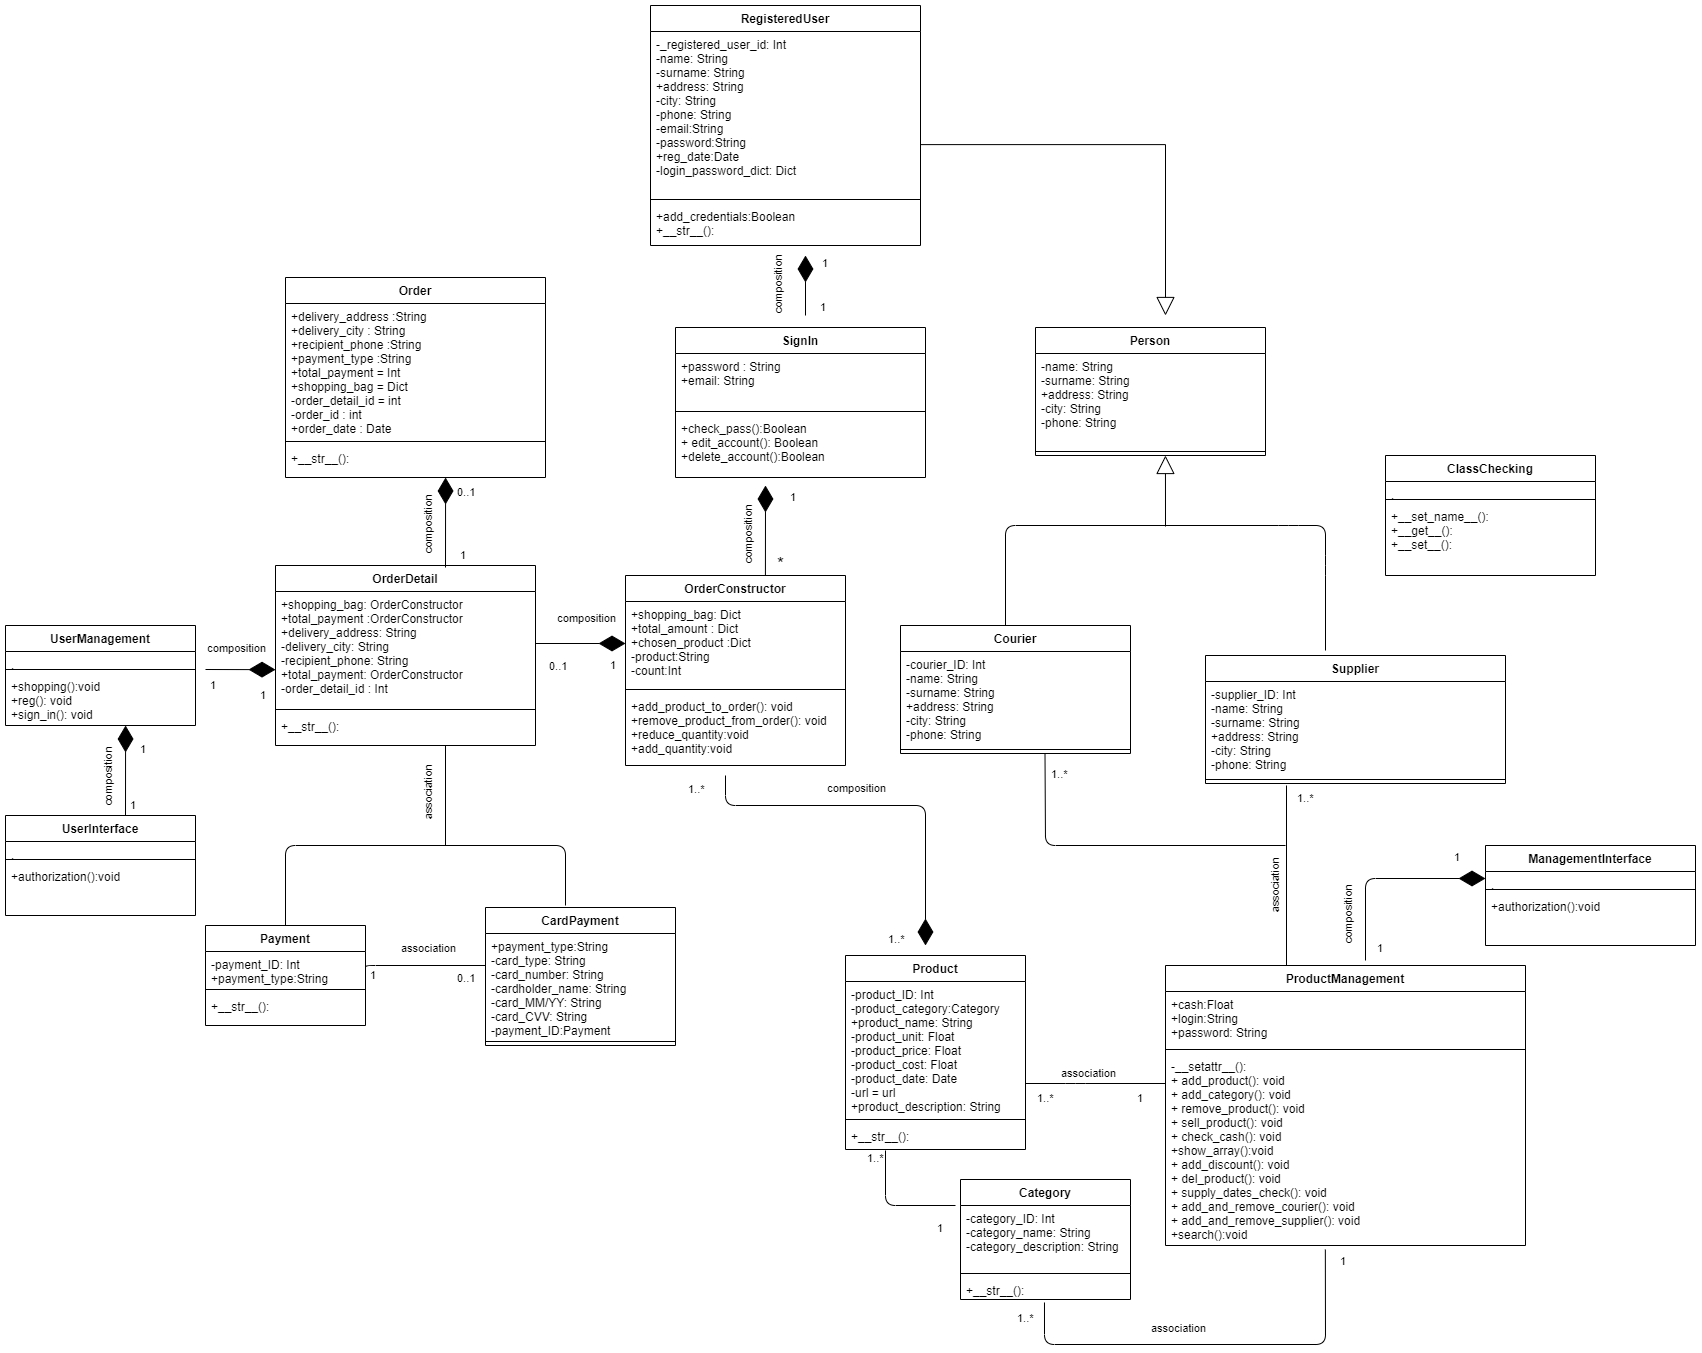

### Required Libraries

In [1]:
from datetime import datetime, date
import re
import mysql.connector
from mysql.connector import Error
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk 

### Creation of descriptors  

In [2]:
class CheckFloat:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        try:
            if float(value) > 0:
                instance.__dict__[self.__name] = float(value)
            else:
                instance.__dict__[self.__name] =  'Wrong format'
        except ValueError:
            instance.__dict__[self.__name] =  'Wrong format'


In [3]:
class CheckDate:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        check = value.split()
        if len(check) == 3:
            try:
                date(int(check[0]), int(check[1]), int(check[2]))
                instance.__dict__[self.__name] = date(int(check[0]), int(check[1]), int(check[2]))
            except ValueError:
                instance.__dict__[self.__name] =  'Wrong format'
        else:
            instance.__dict__[self.__name] =  'Wrong format'


In [4]:
class CheckEmail:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        pattern = "^[^.][\w!#$%&\'\*\+\-\/\=\?\^\_\`\{\}\|\~\.]{1,64}[^.]@\w{1}[\w\-]{0,253}\w{1}\.[a-z]{2,}"
        result = re.fullmatch(pattern, value)
        if result:
            instance.__dict__[self.__name] = value
        else: 
            instance.__dict__[self.__name] =  'Wrong format'


In [5]:
class CheckString:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        number = 0
        for i in value.split():
            if i.isalpha() == True:
                number += 1
        if number == len(value.split()):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [6]:
class CheckMMYY:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 4):
            if (value[0] == '0') and (value[1] in '123456789'):
                instance.__dict__[self.__name] = value[:2] + '/' + value[2:]
            elif (value[0] == '1') and (value[1] in '012'): 
                instance.__dict__[self.__name] = value[:2] + '/' + value[2:]
            else:
                instance.__dict__[self.__name] =  'Wrong format'
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [7]:
class CheckCVV:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 3):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [8]:
class CheckCardNumber:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 16):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [9]:
class CheckCardholderName:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        number = 0
        for i in value.split():
            if (i.isalpha() == True) and (i.isupper() == True):
                number += 1
        if number == len(value.split()):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [10]:
class Function:
    def for_print(x):
        print()
        print('Please choose the action: ')
        print()
        print(x)
        print()
        choose = input('Action ID: ')
        return choose

### Creation of "Seller" user's classes

In [11]:
class Category:
    category_name = CheckString()

    def __init__(self, category_name, category_description='Null'):
        self.category_name = category_name
        self.category_description = category_description



In [12]:
class Product:
    product_name = CheckString()
    product_unit = CheckFloat()
    product_price = CheckFloat()
    product_cost = CheckFloat()
    product_date = CheckDate()

    def __init__(self, product_category, supplier_id, product_brand, product_name, product_unit, product_price, product_cost, product_color,
                 product_date, url="https://im0-tub-ru.yandex.net/i?id=507ebe6d4dc52b87c3d0028ae6dc10bc-l&n=13", product_description='Null'):
        self.product_category = product_category
        self.supplier_id = supplier_id
        self.product_brand = product_brand
        self.product_name = product_name
        self.product_unit = product_unit
        self.product_price = product_price
        self.product_cost = product_cost
        self.product_color = product_color
        self.product_date = product_date
        self.url = url
        self.product_description = product_description


In [13]:
class Person:
    name = CheckString()
    surname = CheckString()
    def __init__(self, name, surname, address, city, phone):
        self.name = name
        self.surname = surname
        self.address = address
        self.city = city
        self.phone = phone

In [14]:
class Courier(Person):

    def __init__(self, name, surname, address, city, phone):
        super().__init__(name, surname, address, city, phone)


In [15]:
class Supplier(Person):
    
    def __init__(self, company, name, surname, address, city, phone):
        super().__init__(name, surname, address, city, phone)
        self.company = company


### Creating connection between MySql database and Python code

In [16]:
class MySQL:
    @staticmethod
    def create_connection(host_name, user_name, user_password, db_name):
        connection = None
        try:
            connection = mysql.connector.connect(
                host=host_name,
                user=user_name,
                passwd=user_password,
                database=db_name
            )
        except Error as e:
            print(f"The error '{e}' occurred")

        return connection
    
    @staticmethod
    def execute_query(connection, query):
        cursor = connection.cursor()
        try:
            cursor.execute(query)
            connection.commit()
            print("Query executed successfully")
        except Error as e:
            print(f"The error '{e}' occurred")
        
    @staticmethod
    def executemany_query(connection, query, values):
        cursor = connection.cursor()
        try:
            cursor.executemany(query, values)
            connection.commit()
        except Error as e:
            print(f"The error '{e}' occurred")
            
    @staticmethod
    def dictionary_transformation(transform_item):
        result = []
        for i in transform_item.values():
            result.append(i)  
        return tuple(result)
    
    
    @staticmethod
    def fetchall(connection, query):
        cursor = connection.cursor(buffered=True)
        result = None
        try:
            cursor.execute(query)
            result = cursor.fetchall()
            return result
        except Error as e:
            print(f"The error '{e}' occurred")  
    
    @staticmethod
    def fetchone(connection, query):
        cursor = connection.cursor(buffered=True)
        result = None
        try:
            cursor.execute(query)
            result = cursor.fetchone()
            return result
        except Error as e:
            print(f"The error '{e}' occurred") 

### "Seller"'s interface

In [17]:
class ProductManagement:
    cash = 100000
    login = 'manager'
    password = '1211'
    mysql = MySQL()
    connection = mysql.create_connection("localhost", "root", "Aa050414*", "online_shop")
    
    def __setattr__(self, key, value):
        if key == 'password':
            raise AttributeError
        else:
            self.__dict__[key] = value           

In [18]:
class Windows:
    @staticmethod
    def add_product():
        product_info = []
        
        def submit():
            product_info1 = []
            for i in product_info:
                product_info1.append(i.get())
            if len(product_info1) == 9:
                query = f"SELECT * FROM categories where name = '{box_1.get()}'"
                category = ProductManagement.mysql.fetchone(ProductManagement.connection, query)[0]
                query = f"SELECT * FROM suppliers where company = '{box_2.get()}'"
                supplier = ProductManagement.mysql.fetchone(ProductManagement.connection, query)[0]
                new_product = Product(category, supplier, product_info1[0], product_info1[1], product_info1[2], product_info1[3],
                                     product_info1[4], product_info1[5], product_info1[6], product_info1[7],
                                     product_info1[8])

                if 'Wrong format' not in new_product.__dict__.values():
                    query = "INSERT INTO products ( category_id, supplier_id, brand, name, unit, price, cost, color, get_date, url, description) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
                    value = ProductManagement.mysql.dictionary_transformation(new_product.__dict__)
                    ProductManagement.mysql.executemany_query(ProductManagement.connection, query,[value])

                    ProductManagement.cash -= new_product.product_cost * new_product.product_unit
                    window.destroy()
                else:
                    messagebox.showinfo('Attention','Wrong format.')
            else:
                messagebox.showinfo('Attention','Missing information')
        
        def exit_system():
            window.destroy()
            
        def get_categories():
            query = f"SELECT * FROM categories"
            rows = ProductManagement.mysql.fetchall(ProductManagement.connection, query)
            result = []
            for row in rows:
                result.append(row[1])
            return result
        
        def get_suppliers():
            query = f"SELECT * FROM suppliers"
            rows = ProductManagement.mysql.fetchall(ProductManagement.connection, query)
            result = []
            for row in rows:
                result.append(row[1])
            return result
                
            
        window = tk.Tk()
        window.title("Add product")
        window.geometry('900x400+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 2, 4, 5, 7, 8, 10, 11, 13, 14]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=4)
        
        labels = [['Product brand', 3, 0, 3, 1], ['Product name', 3, 2, 3, 3],
                  ['Product unit', 6, 0, 6, 1], ['Product price', 6, 2, 6, 3],
                  ['Product cost', 9, 0, 9, 1], ['Product color', 9, 2, 9, 3],
                  ['Product date', 12, 0, 12, 1], ['Image URL', 12, 2, 12, 3],
                  ['Product description', 15, 0, 15, 1]]
        
        tk.Label(window, text='Product category', font=('Arial', 15), bg='white').grid(row=0, column=0, stick='w')
        box_1 = ttk.Combobox(window, values=get_categories(), font=('Arial', 15))
        box_1.current(0)
        box_1.grid(row=0, column=1)
        
        tk.Label(window, text='Supplier', font=('Arial', 15), bg='white').grid(row=0, column=2, stick='w')
        box_2 = ttk.Combobox(window, values=get_suppliers(), font=('Arial', 15))
        box_2.current(0)
        box_2.grid(row=0, column=3)
        
        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            product_info.append(entry)
            
        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=15, column=3, stick='we', columnspan=2)
        
        tk.Label(window, bg='white').grid(row=15, column=5, stick='we')
        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=15, column=6, stick='we')
        
        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)
        window.grid_columnconfigure(2, minsize=100)
        window.grid_columnconfigure(3, minsize=100)
        window.grid_columnconfigure(6, minsize=100)
        window.mainloop()
        
        
    @staticmethod
    def remove_product():
        product_info = []
        
        def submit():
            product_info1 = []
            for i in product_info:
                product_info1.append(i.get())
            if len(product_info1) == 2:   
                
                query = f"SELECT * FROM products WHERE name = '{product_info1[0]}'"
                row = [ProductManagement.mysql.fetchone(ProductManagement.connection, query)]
                if row[0] != None:
                    try:
                        if row[0][5] >= int(product_info1[1]):
                            query = "SET SQL_SAFE_UPDATES = 0"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            query = f"UPDATE products SET unit = {row[0][5] - int(product_info1[1])} where id = {row[0][0]}"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            window.destroy()
                        else:
                            messagebox.showinfo('Attention','Not enough products in stock.')
                    except ValueError:
                        messagebox.showinfo('Attention','Wrong format.')
                else:
                    messagebox.showinfo('Attention','No product was found.')
            else:
                messagebox.showinfo('Attention','Missing information.')
            
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Remove product")
        window.geometry('400x150+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 3]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        labels = [['Product name', 0, 0, 0, 1], ['Product quantity', 2, 0, 2, 1]]

        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            product_info.append(entry)

        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=4, column=1, stick='we')

        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=4, column=0, stick='we')

        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)

        window.mainloop()
        
    @staticmethod
    def sell_product():
        product_info = []
        
        def submit():
            product_info1 = []
            for i in product_info:
                product_info1.append(i.get())
            if len(product_info1) == 2:   
                
                query = f"SELECT * FROM products WHERE name = '{product_info1[0]}'"
                row = [ProductManagement.mysql.fetchone(ProductManagement.connection, query)]
                if row[0] != None:
                    try:
                        if row[0][5] >= int(product_info1[1]):
                            query = "SET SQL_SAFE_UPDATES = 0"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            query = f"UPDATE products SET unit = {row[0][5] - int(product_info1[1])} where id = {row[0][0]}"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            ProductManagement.cash += int(product_info1[1]) * int(row[0][6])
                            window.destroy()
                        else:
                            messagebox.showinfo('Attention','Not enough products in stock.')
                    except ValueError:
                        messagebox.showinfo('Attention','Wrong format.')
                else:
                    messagebox.showinfo('Attention','No product was found.')
            else:
                messagebox.showinfo('Attention','Missing information')
            
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Sell product")
        window.geometry('400x150+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 3]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        labels = [['Product name', 0, 0, 0, 1], ['Product quantity', 2, 0, 2, 1]]

        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            product_info.append(entry)

        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=4, column=1, stick='we')

        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=4, column=0, stick='we')

        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)

        window.mainloop()
        
        
    @staticmethod
    def add_discount():
        product_info = []
        
        def submit():
            product_info1 = []
            for i in product_info:
                product_info1.append(i.get())
            if len(product_info1) == 2:   
                
                query = f"SELECT * FROM products WHERE name = '{product_info1[0]}'"
                row = [ProductManagement.mysql.fetchone(ProductManagement.connection, query)]
                if row[0] != None:
                    try: 
                        if int(product_info1[1]) <= 100:
                            query = "SET SQL_SAFE_UPDATES = 0"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            query = f"UPDATE products SET price = {float(row[0][6]) * (1 - int(product_info1[1])/100)} where id = {row[0][0]}"
                            ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                            window.destroy()
                        else:
                            messagebox.showinfo('Attention',"Discount can't be higher than 100%")
                    except ValueError:
                        messagebox.showinfo('Attention','Wrong format.')
                        
                else:
                    messagebox.showinfo('Attention','No product was found.')
            else:
                messagebox.showinfo('Attention','Missing information.')
            
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Add discount")
        window.geometry('400x150+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 3]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        labels = [['Product name', 0, 0, 0, 1], ['Discount(%)', 2, 0, 2, 1]]

        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            product_info.append(entry)
        
        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=4, column=1, stick='we')

        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=4, column=0, stick='we')

        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)

        window.mainloop()
        
    @staticmethod
    def del_item(column):
        info = []
        
        def submit():
            info1 = []
            for i in info:
                info1.append(i.get())
            if len(info1) == 1:   
                query = f"SELECT * FROM {column} WHERE name = '{info1[0]}'"
                row = [ProductManagement.mysql.fetchone(ProductManagement.connection, query)]
                if row[0] != None:
                    query = f"DELETE FROM {column} WHERE id = {row[0][0]}"
                    ProductManagement.mysql.execute_query(ProductManagement.connection, query)
                    window.destroy()
                else:
                    messagebox.showinfo('Attention','No item was found.')
            else:
                messagebox.showinfo('Attention','Missing information')
            
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Delete item")
        window.geometry('400x100+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 3]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        labels = [['Item name', 0, 0, 0, 1]]

        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            info.append(entry)

        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=4, column=1, stick='we')

        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=4, column=0, stick='we')

        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)

        window.mainloop()
        
    @staticmethod
    def add_category():
        category_info = []
        
        def submit():
            category_info1 = []
            for i in category_info:
                category_info1.append(i.get())
            if len(category_info1) == 2:
                new_category = Category(category_info1[0],category_info1[1])
                if 'Wrong format' not in new_category.__dict__.values():
                    query = "INSERT INTO categories ( name, description ) VALUES ( %s, %s )"
                    value = ProductManagement.mysql.dictionary_transformation(new_category.__dict__)
                    ProductManagement.mysql.executemany_query(ProductManagement.connection, query,[value])
                    window.destroy()
                else:
                    messagebox.showinfo('Attention','Wrong format.')
            else:
                messagebox.showinfo('Attention','Missing information')
            
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Add category")
        window.geometry('400x150+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 3]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        labels = [['Category name', 0, 0, 0, 1], ['Description', 2, 0, 2, 1]]

        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            category_info.append(entry)

        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=4, column=1, stick='we')

        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=4, column=0, stick='we')

        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)

        window.mainloop()
        
    @staticmethod
    def add_courier():
        courier_info = []
        
        def submit():
            courier_info1 = []
            for i in courier_info:
                courier_info1.append(i.get())
            if len(courier_info1) == 5:   
                new_courier = Courier(courier_info1[0], courier_info1[1], courier_info1[2], courier_info1[3],
                                     courier_info1[4])

                if 'Wrong format' not in new_courier.__dict__.values():
                    query = "INSERT INTO couriers ( name, surname, address, city, phone) VALUES ( %s, %s, %s, %s, %s)"
                    value = ProductManagement.mysql.dictionary_transformation(new_courier.__dict__)
                    ProductManagement.mysql.executemany_query(ProductManagement.connection, query,[value])
                    window.destroy()
                else:
                    messagebox.showinfo('Attention','Wrong format.')
            else:
                messagebox.showinfo('Attention','Missing information')
        
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Add courier")
        window.geometry('900x300+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 2, 4, 5]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=4)
        
        labels = [['Name', 0, 0, 0, 1], ['Surname', 0, 2, 0, 3],
                  ['Address', 3, 0, 3, 1], ['City', 3, 2, 3, 3],
                  ['Phone', 6, 0, 6, 1]]
        
        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            courier_info.append(entry)
            
        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=6, column=3, stick='we', columnspan=2)
        
        tk.Label(window, bg='white').grid(row=6, column=5, stick='we')
        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=6, column=6, stick='we')
        
        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)
        window.grid_columnconfigure(2, minsize=100)
        window.grid_columnconfigure(3, minsize=100)
        window.grid_columnconfigure(6, minsize=100)
        window.mainloop()
        
    @staticmethod
    def add_supplier():
        supplier_info = []
        
        def submit():
            supplier_info1 = []
            for i in supplier_info:
                supplier_info1.append(i.get())
            if len(supplier_info1) == 6:   
                new_supplier = Supplier(supplier_info1[0], supplier_info1[1], supplier_info1[2], supplier_info1[3],
                                     supplier_info1[4], supplier_info1[5])

                if 'Wrong format' not in new_supplier.__dict__.values():
                    query = "INSERT INTO suppliers ( company, name, surname, address, city, phone) VALUES ( %s, %s, %s, %s, %s, %s)"
                    new_dict = {1:new_supplier.__dict__['company']}
                    for i, k in new_supplier.__dict__.items():
                        if i != 'company':
                            new_dict[i] = k
                    value = ProductManagement.mysql.dictionary_transformation(new_dict)
                
                    ProductManagement.mysql.executemany_query(ProductManagement.connection, query,[value])
                    window.destroy()
                else:
                    messagebox.showinfo('Attention','Wrong format.')
            else:
                messagebox.showinfo('Attention','Missing information')
        
        def exit_system():
            window.destroy() 
            
        window = tk.Tk()
        window.title("Add supplier")
        window.geometry('900x300+450+150')
        window['bg'] = 'white'
        window.resizable(False, False)

        for i in [1, 2, 4, 5, 7]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=4)
        
        labels = [['Company', 0, 0, 0, 1], ['Name', 0, 2, 0, 3],
                  ['Surname', 3, 0, 3, 1], ['Address', 3, 2, 3, 3],
                  ['City', 6, 0, 6, 1], ['Phone', 6, 2, 6, 3]]
        
        for i in labels:
            tk.Label(window, text=i[0], font=('Arial', 15), bg='white').grid(row=i[1], column=i[2], stick='w')
            entry = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
            entry.grid(row=i[3], column=i[4], stick='we')
            supplier_info.append(entry)
            
        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
        submit1.grid(row=8, column=0, stick='we', columnspan=2)
        
        tk.Label(window, bg='white').grid(row=8, column=2, stick='we')
        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=8, column=3, stick='we')
        
        window.grid_columnconfigure(0, minsize=100)
        window.grid_columnconfigure(1, minsize=100)
        window.grid_columnconfigure(2, minsize=100)
        window.grid_columnconfigure(3, minsize=100)
        window.mainloop()
        
    @staticmethod
    def show_info(table):
        
        query = f"SELECT * FROM {table}"
        rows = ProductManagement.mysql.fetchall(ProductManagement.connection, query)
        query = f"SHOW columns FROM {table}"
        columns = ProductManagement.mysql.fetchall(ProductManagement.connection, query)
        
        window = tk.Tk()
        window.geometry('1200x400')
        window.title(f"{table}")
            
        tree = ttk.Treeview(window, columns=columns, show='headings')
            
        for column in columns:
            tree.heading(column, text=column[0])

        for row in rows:
            tree.insert('', tk.END, values=row)


        def item_selected(event):
            for selected_item in tree.selection():
                item = tree.item(selected_item)
                record = item['values']
                #showinfo(title='Information', message=','.join(record))


        tree.bind('<<TreeviewSelect>>', item_selected)

        tree.grid(row=0, column=0, sticky='nsew')

            
        scrollbar = ttk.Scrollbar(window, orient=tk.VERTICAL, command=tree.yview)
        tree.configure(yscroll=scrollbar.set)
        scrollbar.grid(row=0, column=1, sticky='ns')
            
        scrollbar_h = ttk.Scrollbar(window, orient=tk.HORIZONTAL, command=tree.xview)
        tree.configure(xscroll=scrollbar.set)
        scrollbar_h.grid(row=1, column=0, sticky='ew')
            
        window.grid_columnconfigure(0, weight=1)
        window.grid_rowconfigure(0, weight=1)
            
        window.mainloop() 
        
    @staticmethod
    def search_item(table, name):
        query = f"select * from {table} where name LIKE '%{name}%'"
        rows = ProductManagement.mysql.fetchall(ProductManagement.connection, query)
        if len(list(rows)) == 0:
            messagebox.showinfo('Attention','No results found')
        else:
            query = f"SHOW columns FROM {table}"
            columns = ProductManagement.mysql.fetchall(ProductManagement.connection, query)

            window = tk.Tk()
            window.geometry('1200x200')
            window.title(f"{table}")

            tree = ttk.Treeview(window, columns=columns, show='headings')

            for column in columns:
                tree.heading(column, text=column[0])

            for row in rows:
                tree.insert('', tk.END, values=row)


            def item_selected(event):
                for selected_item in tree.selection():
                    item = tree.item(selected_item)
                    record = item['values']
                    #showinfo(title='Information', message=','.join(record))


            tree.bind('<<TreeviewSelect>>', item_selected)

            tree.grid(row=0, column=0, sticky='nsew')


            scrollbar = ttk.Scrollbar(window, orient=tk.VERTICAL, command=tree.yview)
            tree.configure(yscroll=scrollbar.set)
            scrollbar.grid(row=0, column=1, sticky='ns')

            scrollbar_h = ttk.Scrollbar(window, orient=tk.HORIZONTAL, command=tree.xview)
            tree.configure(xscroll=scrollbar.set)
            scrollbar_h.grid(row=1, column=0, sticky='ew')

            window.grid_columnconfigure(0, weight=1)
            window.grid_rowconfigure(0, weight=1)
            
            window.mainloop() 
        
      
    @staticmethod
    def management_interface():
        products = ('Add product', 'Remove product', 'Sell product', 'Add discount', 'Delete product')
        category = ('Add category', 'Delete category')
        courier = ('Add courier', 'Delete courier')
        supplier = ('Add supplier', 'Delete supplier')
        detail = ('products', 'categories', 'couriers', 'suppliers', 'users')

        def exit_system():
            window.destroy()

        def read_btn_1():
            chooser = box_1.get()
            if chooser == 'Add product':
                Windows.add_product()
            elif chooser == 'Remove product':
                Windows.remove_product()
            elif chooser == 'Sell product':
                Windows.sell_product()
            elif chooser == 'Add discount':
                Windows.add_discount()
            else:
                Windows.del_item('products')

        def read_btn_2():
            chooser = box_2.get()
            if chooser == 'Add category':
                Windows.add_category()
            else:
                Windows.del_item('categories')

        def read_btn_3():
            chooser = box_3.get()
            if chooser == 'Add courier':
                Windows.add_courier()
            else:
                Windows.del_item('couriers')

        def read_btn_4():
            chooser = box_4.get()
            if chooser == 'Add supplier':
                Windows.add_supplier()
            else:
                Windows.del_item('suppliers')

        def read_btn_5():
            cash.delete(0, tk.END)
            cash.insert(0, ProductManagement.cash)

        def read_btn_6():
            show = box_5.get()
            Windows.show_info(show)

        def read_btn_7():
            table = box_6.get()
            name = search.get()
            Windows.search_item(table, name)

        window = tk.Tk()
        window.title("Management interface")
        window.geometry('500x620+400+50')
        window['bg'] = 'white'
        window.resizable(False, False)


        for i in [2, 5, 8, 11, 14, 17, 21]:
            tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)

        tk.Label(window, text='Products', font=('Arial', 15), bg='white').grid(row=0, column=0, stick='w')
        box_1 = ttk.Combobox(window, values=products, font=('Arial', 15))
        box_1.current(0)
        box_1.grid(row=0, column=1)


        submit1 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=read_btn_1)
        submit1.grid(row=1, column=1, stick='we')


        tk.Label(window, text='Categories', font=('Arial', 15), bg='white').grid(row=3, column=0, stick='w')
        box_2 = ttk.Combobox(window, values=category, font=('Arial', 15))
        box_2.current(0)
        box_2.grid(row=3, column=1)


        submit2 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=read_btn_2)
        submit2.grid(row=4, column=1, stick='we')



        tk.Label(window, text='Couriers', font=('Arial', 15), bg='white').grid(row=6, column=0, stick='w')
        box_3 = ttk.Combobox(window, values=courier, font=('Arial', 15))
        box_3.current(0)
        box_3.grid(row=6, column=1)


        submit3 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=read_btn_3)
        submit3.grid(row=7, column=1, stick='we')


        tk.Label(window, text='Suppliers', font=('Arial', 15), bg='white').grid(row=9, column=0, stick='w')
        box_4 = ttk.Combobox(window, values=supplier, font=('Arial', 15))
        box_4.current(0)
        box_4.grid(row=9, column=1)


        submit4 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=read_btn_4)
        submit4.grid(row=10, column=1, stick='we')


        tk.Label(window, text='Check cash', font=('Arial', 15), bg='white').grid(row=12, column=0, stick='w')
        cash = tk.Entry(window, bg='white', fg='black', font=('Arial', 15), justify=tk.RIGHT)
        cash.grid(row=12, column=1, stick='we')


        cash_btn = tk.Button(window, text='Check', fg='white', bg='grey', font=('Arial', 10), command=read_btn_5)
        cash_btn.grid(row=13, column=1, stick='we')


        tk.Label(window, text='Show information', font=('Arial', 15), bg='white').grid(row=15, column=0, stick='w')
        box_5 = ttk.Combobox(window, values=detail, font=('Arial', 15))
        box_5.current(0)
        box_5.grid(row=15, column=1)


        submit5 = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=read_btn_6)
        submit5.grid(row=16, column=1, stick='we')


        tk.Label(window, text='Search', font=('Arial', 15), bg='white').grid(row=18, column=0, stick='w')
        box_6 = ttk.Combobox(window, values=detail, font=('Arial', 15))
        box_6.current(0)
        box_6.grid(row=18, column=1)
        search = tk.Entry(window, bg='white', fg='black', font=('Arial', 15))
        search.grid(row=19, column=1, stick='we')
        tk.Label(window, font=('Arial', 15), bg='white', text='Name').grid(row=19, column=0, stick='w')
        search_btn = tk.Button(window, text='Search', fg='white', bg='grey', font=('Arial', 10), command=read_btn_7)
        search_btn.grid(row=20, column=1, stick='we')

        tk.Label(window, bg='white').grid(row=21, column=0, stick='we')
        exit_btn = tk.Button(window, text='Exit', fg='white', bg='grey', font=('Arial', 10), command=exit_system)
        exit_btn.grid(row=22, column=1, stick='we')

        window.grid_columnconfigure(0, minsize=150)
        window.grid_columnconfigure(1, minsize=100)
        window.mainloop()

In [19]:
tries = 0
def welcome():
    global tries
    def submit():
        global tries
        login_check = login.get()
        password_check = password.get()
        if login_check == ProductManagement.login and password_check == ProductManagement.password:
            window.destroy()
            tries += 1
            return True
        else:
            messagebox.showinfo('Attention','Wrong login or password.')
            login.delete(0, tk.END)
            password.delete(0, tk.END)
    
    window = tk.Tk()
    window.title("Welcome")
    window.geometry('250x280+500+250')
    window['bg'] = 'white'
    window.resizable(False, False)

    for i in [1, 2, 4, 6, 8, 9]:
        tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)
    tk.Label(window, text='Welcome to management system.', font=('Arial', 10, 'bold'), bg='white').grid(row=0, column=0,
                                                                                                        stick='we',
                                                                                                        columnspan=2)
    tk.Label(window, text='Please input your login and password.', font=('Arial', 10), bg='white').grid(row=3, column=0,
                                                                                                        stick='we',
                                                                                                        columnspan=2)

    tk.Label(window, text='Login', font=('Arial', 10), bg='white').grid(row=5, column=0, stick='w')
    login = tk.Entry(window, bg='grey', fg='white', justify=tk.RIGHT)
    login.grid(row=5, column=1)

    tk.Label(window, text='Password', font=('Arial', 10), bg='white').grid(row=7, column=0, stick='w')
    password = tk.Entry(window, bg='grey', fg='white', show='*', justify=tk.RIGHT)
    password.grid(row=7, column=1)

    tk.Label(window, bg='white').grid(row=i, column=0, stick='we', columnspan=2)
    submit_btn = tk.Button(window, text='Submit', fg='white', bg='grey', font=('Arial', 10), command=submit)
    submit_btn.grid(row=10, column=1, stick='we', columnspan=2)
    window.grid_columnconfigure(0, minsize=100)
    window.grid_columnconfigure(1, minsize=100)

    window.mainloop()
    if tries != 1:
        return False
    tries = 0
    return True


### Creation of "Buyer" user's classes

In [20]:
class Payment:
    card_mm_yy = CheckMMYY()
    card_type = CheckString()
    card_cvv = CheckCVV()
    cardholder_name = CheckCardholderName()
    card_number = CheckCardNumber()
    
    def __init__(self, payment_type, card_type, card_number, cardholder_name, card_mm_yy, card_cvv):
        self.payment_type = payment_type
        self.card_type = card_type
        self.card_number = card_number
        self.cardholder_name = cardholder_name
        self.card_mm_yy = card_mm_yy
        self.card_cvv = card_cvv
        
        
    def __str__(self):
        return f' Card type - {self.card_type} \n Card number - {self.card_number} \n Cardholder name - {self.cardholder_name} \n MM/YY - {self.card_mm_yy} \n Card CVV - {self.card_cvv}'


In [21]:
class OrderConstructor: 
    shopping_bag = {}
    chosen_product = {}
    total_amount = {}
    ids = {}
    product = CheckString()
    count = CheckFloat()
    
    def __init__(self, product, count):
        self.product = product
        self.count = count

    def add_product_to_order(self):
        query = f"select * from products where name LIKE '%{self.product}%'"
        row = ProductManagement.mysql.fetchone(ProductManagement.connection, query)
        if (len(row) != 0) and (self.count <= row[5]):
            OrderConstructor.shopping_bag[row[4]] = self.count
            OrderConstructor.total_amount[row[4]] = [row[6], int(self.count)]
            OrderConstructor.chosen_product[row[4]] = row[5]
            OrderConstructor.ids[row[4]] = row[0]
        else:
            print('Impossible to add the item to shopping bag. \n')

            
            
    @staticmethod
    def remove_product_from_order():
        product_rem = input('Please input the product you want to remove: ')
        if product_rem in OrderConstructor.shopping_bag.keys():
            del OrderConstructor.shopping_bag[product_rem]
            del OrderConstructor.total_amount[product_rem]
            del OrderConstructor.ids[product_rem]
            return OrderConstructor.shopping_bag
        else:
            print('Impossible to remove the item from shopping bag. \n')
    
    @staticmethod
    def reduce_quantity(): 
        print('Please input the product and quantity you want to reduce: \n')
        product_red = input('Product name: ')
        quantity_red = input('Quantity: ')
        if product_red in OrderConstructor.shopping_bag.keys():
            if (quantity_red.isnumeric() == True) and (int(quantity_red) <= OrderConstructor.shopping_bag[product_red]):
                OrderConstructor.shopping_bag[product_red] -= int(quantity_red)
                OrderConstructor.total_amount[product_red][1] -= int(quantity_red)
            else:
                print('Wrong quantity \n')
        else:
            print('Wrong product name \n')
        
    @staticmethod
    def add_quantity(): 
        print('Please input the product and quantity you want to add: \n')
        product_add = input('Product name: ')
        quantity_add = input('Product quantity: ')
        if (product_add in OrderConstructor.shopping_bag.keys()) & (quantity_add.isnumeric() == True):
            for i , k in OrderConstructor.chosen_product.items():
                if i == product_add:
                    if int(quantity_add) + OrderConstructor.shopping_bag[product_add] <= k:
                        OrderConstructor.shopping_bag[product_add] += int(quantity_add)
                        OrderConstructor.total_amount[product_add][1] += int(quantity_add)
                        return OrderConstructor.shopping_bag
                    else:
                        print('Not enough quantity in stock \n')
        else:
            print('Wrong product name or quantity \n')
     
    @staticmethod
    def clear():
        OrderConstructor.ids = {}
        OrderConstructor.shopping_bag = {}
        OrderConstructor.total_amount = {}
        OrderConstructor.chosen_product = {}
        return 'Clear'

In [22]:
class OrderDetail:
    def __init__(self, order_id, product_id, product_count):
        self.order_id = order_id
        self.product_id = product_id
        self.product_count = product_count


In [23]:
class RegisteredUser(Person):
    def __init__(self, name, surname, address, city, phone, email, password):
        super().__init__(name, surname, address, city, phone)
        self.email = email
        self.password = password
        self.reg_date = datetime.date(datetime.now())
        

In [24]:
class SignIn:
    def __init__(self, email, password):
        self.email = email
        self.password = password

    def check_pass(self):
        query = f"select * from users where email = '{self.email}'"
        row = MySQL.fetchone(ProductManagement.connection, query)
        if len(row) != 0:
            if self.password == row[-2]:
                return True
            return False
        return False


    def edit_account(self): 
        edit = Function.for_print(' Edit name - name \n Edit surname - surname \n Edit address - address \n Edit city - city\
                      \n Edit phone - phone \n Edit password - password')
        new = input('Enter new value: ')
        query = f"select * from users where email = '{self.email}'"
        row = MySQL.fetchone(ProductManagement.connection, query)
        query = "SET SQL_SAFE_UPDATES = 0"
        MySQL.execute_query(ProductManagement.connection, query)
        query = f"UPDATE users SET {edit} = '{new}' where id = {row[0]}"
        MySQL.execute_query(ProductManagement.connection, query)
             
    def delete_account(self):
        delete = input('If you want to delete account input 1, otherwise press any other key to return to previous menu: ')
        if delete == '1':
            query = f"DELETE FROM users WHERE email = '{self.email}'"
            MySQL.execute_query(ProductManagement.connection, query)
            return True
        return False

In [25]:
class Order: 
    def __init__(self, user_id, payment_id, courier_id, 
                 delivery_address, delivery_city, recipient_phone,  total_payment):
        self.user_id = user_id
        self.payment_id = payment_id
        self.courier_id = courier_id
        self.delivery_address = delivery_address
        self.delivery_city = delivery_city
        self.recipient_phone = recipient_phone
        self.total_payment = total_payment
        self.order_date = datetime.date(datetime.now()) 
    
    def __str__(self):
        return f' Order_date - {self.order_date} \n Total Payment - {self.total_payment} \n Delivery Address - {self.delivery_address} \n Delivery City - {self.delivery_city} \n Recipient Phone- {self.recipient_phone}'


### "Buyer"'s inferface

In [26]:
class UserManagement:
    @staticmethod
    def reg():
        new_user = RegisteredUser(input('Name: '), input('Surname: '), input('Address: '), input('City: '), input('Phone: '),
                                         input('Email: '), input('Password: '))
        if 'Wrong format' not in new_user.__dict__.values():
            query = f"SELECT * FROM users where email = '{new_user.email}'"
            row = [MySQL.fetchone(ProductManagement.connection, query)]
            if row[0] == None:
                user = []
                for i in new_user.__dict__.values():
                    user.append(i)
                print(user)
                query = "INSERT INTO users (name, surname, address, city, phone, email, password, date) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s)"
                MySQL.executemany_query(ProductManagement.connection, query, [tuple(user)])
            else:
                print('User with this email already exists. \n')
        else:
            print('Wrong format. \n')
            again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
            if again != '1':
                return 'Thank you'    
    
    @staticmethod
    def shopping():
        while True:
            choose = Function.for_print(' Add product - 1 \n Remove product - 2 \n Reduce quantity - 3 \
                                        \n Add quantity - 4 \n See shopping bag - 5 \n Previous menu - 0')
            if choose == '1':
                buy = OrderConstructor(input("Product name: "), input("Product quantity: "))
                buy.add_product_to_order()
            elif choose == '2':
                OrderConstructor.remove_product_from_order()
            elif choose == '3':
                OrderConstructor.reduce_quantity()
            elif choose == '4':
                OrderConstructor.add_quantity()
            elif choose == '5':
                for i, k in OrderConstructor.shopping_bag.items():
                    print(i, '-', k)
            elif choose == '0':
                return 'Thank you'
            
    @staticmethod
    def sign_in():
        user = SignIn(input('Please input email: '),input('Please input password: '))
        if user.check_pass() == True:
            while True:
                choose = Function.for_print(' See products - 1 \n Edit account - 2 \n Delete account - 3 \
                                            \n Edit shopping bag - 4 \n Fill order detail - 5 \n Exit - 0')
                if choose == '1':
                    query = f"SELECT * FROM products"
                    rows = MySQL.fetchall(ProductManagement.connection, query)

                    print('Total rows: ', len(rows))
                    for row in rows:
                        print(f'Brand - {row[3]}, Name - {row[4]}, Unit - {row[5]}, Price - {row[6]}, Color - {row[8]}')         
                elif choose == '2':
                    user.edit_account()
                elif choose == '3':
                    delete = user.delete_account()
                    if delete == True:
                        return'Thank you' 
                elif choose == '4':
                    UserManagement.shopping()
                elif choose == '5':
                    payment = Function.for_print(' Card - 1 \n Cash - any other key')
                    if payment == '1':
                        payment_card = Payment(2, input('Card type: '), input('Card number: '), input('Cardholder name: '),
                                                  input('Card_mm_yy: '), input('Card_cvv: '))
                        if 'Wrong format' not in payment_card.__dict__.values():
                            payment = []
                            for i in payment_card.__dict__.values():
                                payment.append(i)
                            payment = tuple(payment)
                        else:
                            print()
                            print('Wrong format')
                    else:
                        payment = (1, 'Null', 'Null', 'Null', 'Null', 'Null')
                        
                    if len(payment) == 0:
                        break
                        
                    query = f"SELECT * FROM users where email = '{user.email}'"
                    row = MySQL.fetchone(ProductManagement.connection, query)[0]    
                    money = 0
                    for i in OrderConstructor.total_amount.values():
                        money += i[0] * i[1]    
                    address = input('Delivery address: ')
                    city = input('Delivery city: ')
                    phone = input('Recipient phone: ')
                    order = Order(row, payment[0], np.random.randint(1, 30), address, city, phone, money)
                    if payment[0] == 1:
                        print(' Payment type - Cash')
                    else:
                        print(' Payment type - Card')
                        print(payment_card)
                    print(' Shopping bag \n')
                    for i, k in OrderConstructor.shopping_bag.items():
                        print(f'  {i} - {k}')
                    print(order)
          
                    action = Function.for_print('If you want to submit the order press 1, otherwise press any key')
                    if action == '1':
                        query = f"INSERT INTO payments ( payment_type_id, card_type, card_number, cardholder_name, card_mm_yy, card_cvv ) VALUES ( %s, %s, %s, %s, %s, %s )"
                        MySQL.executemany_query(ProductManagement.connection, query, [payment])
                        query = "SET SQL_SAFE_UPDATES = 0"
                        MySQL.execute_query(ProductManagement.connection, query)
                        query = "INSERT INTO orders ( user_id, payment_id, courier_id, delivery_address, delivery_city, recipient_phone,  total_payment, order_date ) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s )"
                        MySQL.executemany_query(ProductManagement.connection, query, [(row, payment[0], np.random.randint(30), address, city, phone, money,order.order_date)])
                    
                        for k, i in OrderConstructor.ids.items():                          
                            query = "INSERT INTO order_details ( order_id, product_id, product_count ) VALUES ( %s, %s, %s )"
                            order_id = MySQL.fetchall(ProductManagement.connection, 'select * from orders')[-1][0]
                            MySQL.executemany_query(ProductManagement.connection, query, [(order_id, i, OrderConstructor.shopping_bag[k])])
                                                       
                            unit = OrderConstructor.chosen_product[k] - OrderConstructor.shopping_bag[k]
                            query = f"UPDATE products SET unit = {unit} where id = {i}"
                            MySQL.execute_query(ProductManagement.connection, query)   
                            
                                
                        OrderConstructor.clear()
                elif choose == '0':
                    return 'Thank you'
                else:
                    print()
                    print('Wrong input. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'
        else:
            print('Wrong email or password. \n')
            return'Thank you'

In [27]:
class UserInterface:
    @staticmethod
    def authorization():
        print('Welcome to online shopping system. \n')
        while True:
            choose = Function.for_print(' Sign in - 1 \n Registration - 2 \n Exit system - 0')
            if choose == '1':
                UserManagement.sign_in()
            elif choose == '2':
                UserManagement.reg()   
            elif choose == '0':
                print('Thank you')
                OrderConstructor.clear()
                break
            else:
                print('Wrong action ID. \n')
                again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                if again != '1':
                    return 'Thank you'

### Run the program

In [28]:
# Seller

# if welcome() == True:
#     Windows.management_interface()

In [29]:
# Buyer

# UserInterface.authorization()

In [30]:
# Sample user credentials - Login: PnltEbhSu@gmail.com; Password: tWDzPEiHrbFF

#'Visa','1876245733350012','TIGRAN GRIGORYAN','0924','238'